# 4. Vectorization

In [1]:
# import packages
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# instatiate stopwords, porter stemmer and wordnet lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [3]:
# read csv file
data = pd.read_csv("../data/processed_data.csv")

In [4]:
data.head()

,subreddit,title+selftext
0,stocks,Advise on Long Term Stock? I am earning very l...
1,stocks,Dad told me to sell on Monday when the market ...
2,stocks,Merger/accusation question about a game co. An...
3,stocks,Best Software to Track Trades and Create Repor...
4,stocks,"After Driving My Friends Tesla, Here Are My Th..."


In [5]:
# rename "title+selftext" to "posttext"
data = data.rename(columns = {'title+selftext': 'posttext'}, inplace = False)
data.head()

,subreddit,posttext
0,stocks,Advise on Long Term Stock? I am earning very l...
1,stocks,Dad told me to sell on Monday when the market ...
2,stocks,Merger/accusation question about a game co. An...
3,stocks,Best Software to Track Trades and Create Repor...
4,stocks,"After Driving My Friends Tesla, Here Are My Th..."


## 4.1 Count Vectorization

### Create function to remove punctuation, tokenize, remove stopwords, and lemmatize

In [6]:
# Create function to remove punctuation, tokenize, remove stopwords, and lemmatize
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # apply lemmatization and stopwords exclusion within the same step
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [7]:
# Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
count_vect = CountVectorizer(analyzer=clean_text)

# X_counts stores the vectorized version of the data
X_counts = count_vect.fit_transform(data['posttext'])

# Returns the number of rows and columns of X_counts i.e. 3400 posts and 20067 unique words
print(X_counts.shape)

# Returns the unique words across all text messages
print(count_vect.get_feature_names())

(3400, 25025)
['', '0', '00', '000', '00000', '00000000000000000001664', '00000000000001', '000000001', '000000002', '000000026', '000000027', '00000005', '0000000647', '00000008907', '00000045', '0000015', '00002', '00005', '000057064', '00008', '000093992', '000099304', '0001', '00012', '0002', '0003', '0004', '0006', '0008', '00083763', '0009', '001', '0010', '00101', '00105', '0013702798800597', '0015', '001btc01btc1btc10btc', '002', '00210000001', '003', '00334', '0035', '004', '0043', '0045', '005', '0050', '005hour', '006', '00628', '0065447', '00677', '007', '00729', '007839612', '009', '00942', '01', '010', '0100', '0102', '01045', '011', '0115', '012', '0123', '013', '014', '0143btc', '014m', '015', '015btc', '016', '017', '018share', '019', '019share', '02', '020', '0200', '02052021', '021', '02142021', '022', '023', '023025', '023487', '024', '025', '026', '027', '027share', '029', '029lb', '02c', '03', '030', '0300', '0306', '030eps', '031share', '032', '03212025', '033', 

### Store sparse matrix in a dataframe

In [8]:
# expand sparse matrix out to a collection of arrays and then store it in a data frame
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,25015,25016,25017,25018,25019,25020,25021,25022,25023,25024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,,0,00,000,00000,00000000000000000001664,00000000000001,000000001,000000002,000000026,...,zzillow,¼,ängöl,ѕcнool,علي,مصطفى,ندا,يوسف,⅓,ツ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.2 N-grams Vectorization

### Create function to remove punctuation, tokenize, remove stopwords, and lemmatize

In [10]:
# create function to remove punctuation, tokenize, remove stopwords and lemmatize
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords])
    return text

data['posttext_cleaned'] = data['posttext'].apply(lambda x: clean_text(x))
data.head()

,subreddit,posttext,posttext_cleaned
0,stocks,Advise on Long Term Stock? I am earning very l...,advise long term stock earning little moment w...
1,stocks,Dad told me to sell on Monday when the market ...,dad told sell monday market red bc already pro...
2,stocks,Merger/accusation question about a game co. An...,mergeraccusation question game co theater co r...
3,stocks,Best Software to Track Trades and Create Repor...,best software track trade create report hi im ...
4,stocks,"After Driving My Friends Tesla, Here Are My Th...",driving friend tesla thought bullish tesla im ...


### Split dataset based on subreddit

In [11]:
# split dataset based on subreddit
stocks_df = data.loc[data['subreddit'] == 'stocks']
crypto_df = data.loc[data['subreddit'] == 'CryptoCurrency']

In [12]:
stocks_df.head()

,subreddit,posttext,posttext_cleaned
0,stocks,Advise on Long Term Stock? I am earning very l...,advise long term stock earning little moment w...
1,stocks,Dad told me to sell on Monday when the market ...,dad told sell monday market red bc already pro...
2,stocks,Merger/accusation question about a game co. An...,mergeraccusation question game co theater co r...
3,stocks,Best Software to Track Trades and Create Repor...,best software track trade create report hi im ...
4,stocks,"After Driving My Friends Tesla, Here Are My Th...",driving friend tesla thought bullish tesla im ...


In [13]:
crypto_df.head()

,subreddit,posttext,posttext_cleaned
1700,CryptoCurrency,Should I create a gymkhana with all my cryptoc...,create gymkhana cryptocurrencies die hello eve...
1701,CryptoCurrency,A country’s ban on crypto is only valid if you...,country ban crypto valid following understand ...
1702,CryptoCurrency,I was already convinced. Fibonacci golden rati...,already convinced fibonacci golden ratio convi...
1703,CryptoCurrency,From riches to rags 7 months ago I invested 90...,rich rag 7 month ago invested 9000 crypto inve...
1704,CryptoCurrency,From riches to rags 7 months ago I invested 90...,rich rag 7 month ago invested 9000 crypto inve...


### Apply CountVectorizer with N-Grams for r/stocks

In [14]:
# instatiate bigram
ngram_vect = CountVectorizer(ngram_range=(2,2))

# transform 'posttext_cleaned' into a sparse matrix
bigram_stocks = ngram_vect.fit_transform(stocks_df["posttext_cleaned"])

print(bigram_stocks.shape)

(1700, 141054)


In [15]:
# sum all the rows of bigram_stocks to 1 row and store as a dataframe
bigram_stocks_df = pd.DataFrame(bigram_stocks.sum(axis=0))

# rename the columns with word pairs
bigram_stocks_df.columns = ngram_vect.get_feature_names()

bigram_stocks_df.head()

,00 premium,000 00000,000 connection,000 lt,000 million,000 year,00000 virtual,00000000000001 ownership,0008 cell,001 lower,...,ztna product,zuckerberg idea,zuckerberg subpoenaed,zucks playbook,zvia price,zzillow 755,علي ندا,مصطفى علي,ندا born,يوسف مصطفى
0,1,1,3,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
# transpose 'bigram_stocks_df' and store as 'bigram_stocks_df_transposed'
bigram_stocks_df_transposed = bigram_stocks_df.T

bigram_stocks_df_transposed.head()

,0
00 premium,1
000 00000,1
000 connection,3
000 lt,1
000 million,1


In [17]:
# rename the column from 0 to 'count'
bigram_stocks_df_transposed.rename(columns={0: 'count'}, inplace=True)

In [18]:
# sort the dataframe by 'count' in descending order
bigram_stocks_df_transposed = bigram_stocks_df_transposed.sort_values(by = 'count', ascending = False)

In [19]:
bigram_stocks_df_transposed.head()

,count
price target,257
long term,193
stock currently,175
currently around,164
market cap,151


In [20]:
# store the top 20 word pairs 
bigram_stocks_df_transposed_top20 = bigram_stocks_df_transposed.head(20)

<Figure size 1080x1080 with 0 Axes>

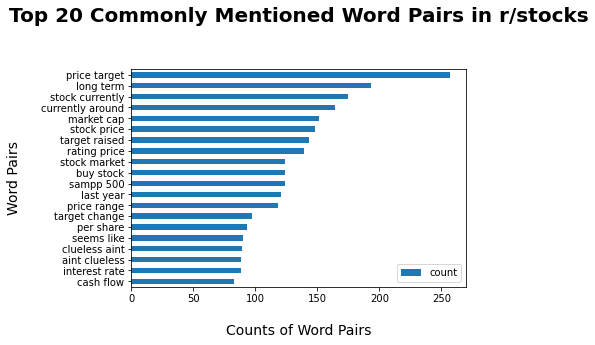

In [21]:
plt.figure(figsize=(15,15));

# plot the horizontal bar chart
ax = bigram_stocks_df_transposed_top20.plot(kind = 'barh', width=0.5)
ax.invert_yaxis()

#set title and subtitle 
ax.text(x=0.5, y=1.2, s='Top 20 Commonly Mentioned Word Pairs in r/stocks', 
        fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

plt.xlabel('Counts of Word Pairs', labelpad=20, size=14)
plt.ylabel('Word Pairs', labelpad=20, size=14);


From the bar chart of the word pairs in r/stocks, there are some interesting word pairs such as 'sampp 500' which refers to S&P 500 index that is used as a measure of US equities. 'price target' is the most commonly mentioned word pair as users are likely to research for target prices to buy or sell their stocks. Other pairs like 'stock currently' and 'stock price' also appear frequently.

### Apply CountVectorizer with N-Grams for r/CryptoCurrency

In [22]:
# instatiate bigram
ngram_vect = CountVectorizer(ngram_range=(2,2))

# transform 'posttext_cleaned' into a sparse matrix
bigram_crypto = ngram_vect.fit_transform(crypto_df["posttext_cleaned"])

print(bigram_crypto.shape)

(1700, 103985)


In [23]:
# sum all the rows of bigram_stocks to 1 row and store as a dataframe
bigram_crypto_df = pd.DataFrame(bigram_crypto.sum(axis=0))

# rename the columns with word pairs
bigram_crypto_df.columns = ngram_vect.get_feature_names()

bigram_crypto_df.head()

,000 day,000 moon,00000000000000000001664 today,000000001 ie,000000002 one,000000026 one,000000027 one,00000005 one,0000000647 another,00000008907 jake,...,zoom theyll,zoom way,zoom whats,zooming brings,zooming help,zooming show,zug switzerland,zynga worked,ängöl brewery,ѕcнool crypтo
0,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [24]:
# transpose 'bigram_stocks_df' and store as 'bigram_stocks_df_transposed'
bigram_crypto_df_transposed = bigram_crypto_df.T

bigram_crypto_df_transposed.head()

,0
000 day,1
000 moon,1
00000000000000000001664 today,1
000000001 ie,1
000000002 one,3


In [25]:
# rename the column from 0 to 'count'
bigram_crypto_df_transposed.rename(columns={0: 'count'}, inplace=True)

# sort the dataframe by 'count' in descending order
bigram_crypto_df_transposed = bigram_crypto_df_transposed.sort_values(by = 'count', ascending = False)

bigram_crypto_df_transposed.head()

,count
gtpoplt gtpoplt,299
bear market,259
bull run,107
long term,86
crypto market,85


In [26]:
# store the top 20 word pairs 
bigram_crypto_df_transposed_top20 = bigram_crypto_df_transposed.head(20)

<Figure size 1296x1296 with 0 Axes>

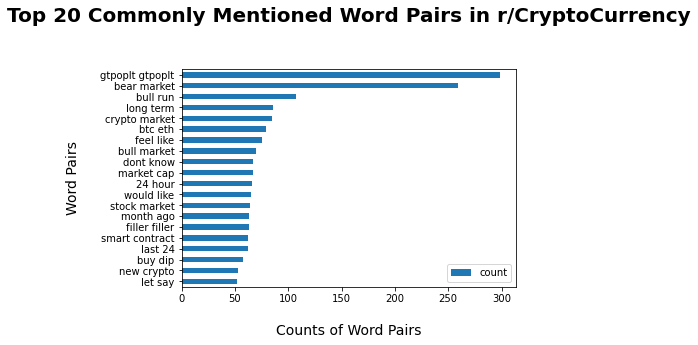

In [39]:
plt.figure(figsize=(18,18));

# plot the horizontal bar chart
ax = bigram_crypto_df_transposed_top20.plot(kind = 'barh', width=0.5)
ax.invert_yaxis()

#set title and subtitle 
ax.text(x=0.5, y=1.2, s='Top 20 Commonly Mentioned Word Pairs in r/CryptoCurrency', 
        fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

plt.xlabel('Counts of Word Pairs', labelpad=20, size=14)
plt.ylabel('Word Pairs', labelpad=20, size=14);

plt.show();

From the bar chart of the word pairs in r/CryptoCurrency, 'gtpoplt gtpoplt' likely refers to the trading of GTO and PLT cryptocurrency exchange pairs. 'btc eth' refers to the crypto currency exchange pair of bitcoin and ethereum. Another interesting word pair is '24 hour' as crypto currency can be traded anytime over 24 hours unlike stocks which have a opening and closing time for trading. 

## 4.3 TF-IDF 

### Create function to remove punctuation, tokenize, remove stopwords and lemmatize

In [28]:
# Create function to remove punctuation, tokenize, remove stopwords and lemmatize
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

### Apply TF-IDF Vectorizer

In [29]:
# Apply TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['posttext'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(3400, 25025)
['', '0', '00', '000', '00000', '00000000000000000001664', '00000000000001', '000000001', '000000002', '000000026', '000000027', '00000005', '0000000647', '00000008907', '00000045', '0000015', '00002', '00005', '000057064', '00008', '000093992', '000099304', '0001', '00012', '0002', '0003', '0004', '0006', '0008', '00083763', '0009', '001', '0010', '00101', '00105', '0013702798800597', '0015', '001btc01btc1btc10btc', '002', '00210000001', '003', '00334', '0035', '004', '0043', '0045', '005', '0050', '005hour', '006', '00628', '0065447', '00677', '007', '00729', '007839612', '009', '00942', '01', '010', '0100', '0102', '01045', '011', '0115', '012', '0123', '013', '014', '0143btc', '014m', '015', '015btc', '016', '017', '018share', '019', '019share', '02', '020', '0200', '02052021', '021', '02142021', '022', '023', '023025', '023487', '024', '025', '026', '027', '027share', '029', '029lb', '02c', '03', '030', '0300', '0306', '030eps', '031share', '032', '03212025', '033', 

### Store sparse matrix in a dataframe

In [30]:
# expand sparse matrix out to a collection of arrays and then store it in a data frame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,,0,00,000,00000,00000000000000000001664,00000000000001,000000001,000000002,000000026,...,zzillow,¼,ängöl,ѕcнool,علي,مصطفى,ندا,يوسف,⅓,ツ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.070952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3397,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3398,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# save dataframes to csv
X_counts_df.to_csv('../data/counts_df.csv',index=False)
X_tfidf_df.to_csv('../data/tfidf_df.csv',index=False)